In [ ]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
hep.style.use(hep.style.LHCb2) # make our plots look good
from scipy.stats import crystalball
from scipy.optimize import curve_fit
from scipy.special import erf
from scipy.integrate import quad

In [ ]:
# Set global font size
plt.rc('font', size=14)          # controls default text size
plt.rc('axes', titlesize=16)     # fontsize of the title
plt.rc('axes', labelsize=13)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the y tick labels
plt.rc('legend', fontsize=14)    # fontsize of the legend

In [ ]:
#I concatenate 2016-2018 DDMD data
branches_c= uproot.concatenate(['/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/LPT/CL18DDMD/LPT_procTuple.root:Lb2JpsiL_eeTuple/DecayTree','/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/LPT/CL16DDMD/LPT_procTuple.root:Lb2JpsiL_eeTuple/DecayTree','/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/LPT/CL17DDMD/LPT_procTuple.root:Lb2JpsiL_eeTuple/DecayTree'], expressions=('Lb_q2','Lb_M','Lb_DTF_L0_JPs_PV_M_0','Lb_DTF_L0_JPs_PV_Lambda0_pplus_ID_0'))



array_c = uproot.concatenate(['/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/LPT/CL18DDMD/LPT_procTuple.root:Lb2JpsiL_eeTuple/DecayTree','/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/LPT/CL16DDMD/LPT_procTuple.root:Lb2JpsiL_eeTuple/DecayTree','/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_EE_MVA/LPT/CL17DDMD/LPT_procTuple.root:Lb2JpsiL_eeTuple/DecayTree'], expressions=('Pi_AtVtx_PE','P_AtVtx_P','Pi_AtVtx_PX','P_AtVtx_PX','Pi_AtVtx_PY','P_AtVtx_PY','Pi_AtVtx_PZ','P_AtVtx_PZ'))



In [ ]:
mass_K0_c= np.sqrt(np.square(array_c['Pi_AtVtx_PE'] +np.sqrt(np.square(139.57)+np.square(array_c['P_AtVtx_P'])))
                 - np.square(array_c['Pi_AtVtx_PX'] +array_c['P_AtVtx_PX'])
                 - np.square(array_c['Pi_AtVtx_PY']+array_c['P_AtVtx_PY'])
                 -np.square(array_c['Pi_AtVtx_PZ']+array_c['P_AtVtx_PZ']))

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.hist(mass_K0_c, bins=100, range = (300,600))
plt.xlabel(mass_K0_c)
plt.ylabel('number of events')
plt.show()

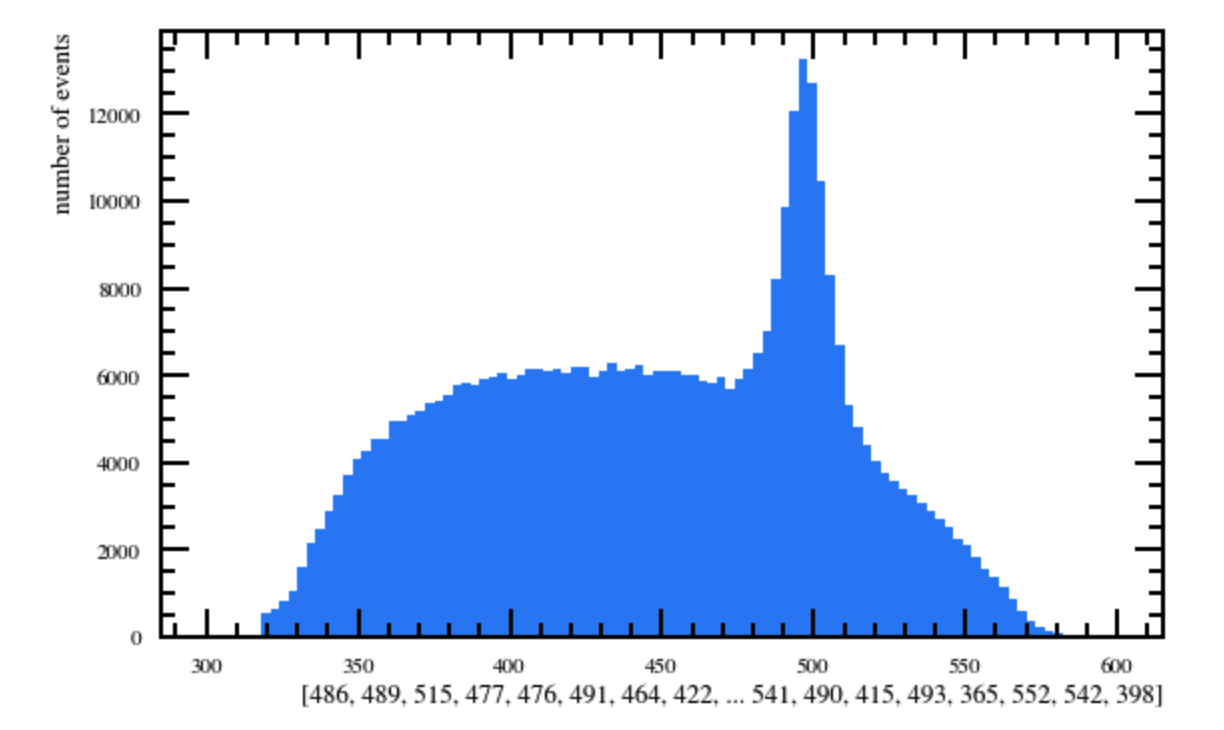

In [ ]:
data= mass_K0_c.to_numpy()

min_x = 300
max_x = 600
n_bins = 75


bin_contents, bin_edges = np.histogram(data, bins=n_bins, range=(min_x, max_x))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
y_errors = np.sqrt(bin_contents)


plt.figure(figsize=(8,6))
plt.errorbar(bin_centers, bin_contents, yerr=y_errors, fmt='o',color='black', label='2016-2018 DDMD data', markersize=3, capsize=1.5, elinewidth=1.5 )

plt.xlabel(r'reconstructed $K^{0}_{s}$ mass [MeV/$c^2$]')
plt.ylabel('Number of events per 4 MeV/$c^2$')
plt.legend(framealpha=0.7,loc='upper right')
#plt.legend(facecolor='white', edgecolor='black', loc='upper right', frameon=True)
plt.show()

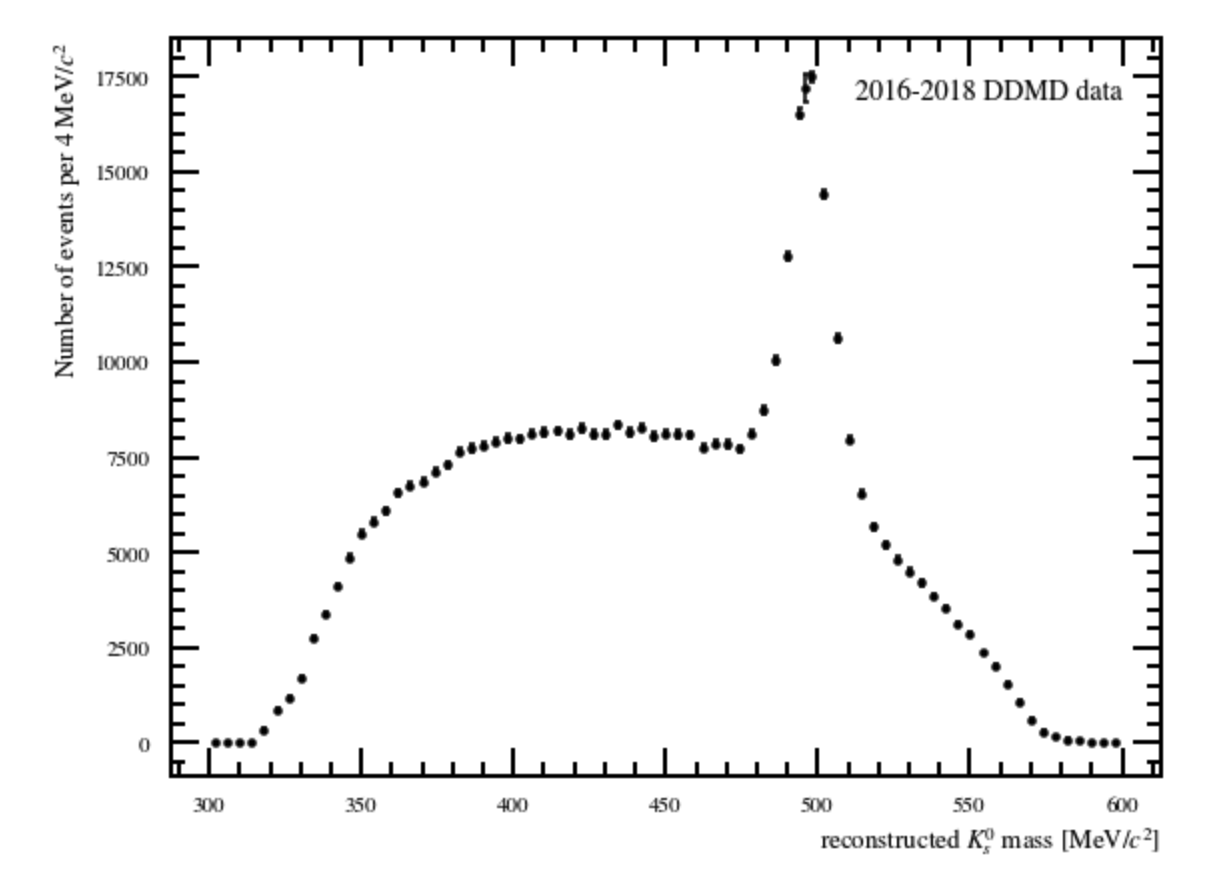